In [1]:
# import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Advertise_sales.csv',header=0,names=['Sl','TV','Radio','Newspaper','Sales'])

In [3]:
df.head()

,Sl,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,Sl,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
df.sample()

,Sl,TV,Radio,Newspaper,Sales
91,92,28.6,1.5,33.0,7.3


# Lets Know the Columns:

1. Sl= Seial Number
2. TV= Ads given in Television
3. Radio= Ads given in Radio
4. Newspaper= Ads given in Newspaper
5. Sales= Total Sales

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sl         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Determine The value to be in integer and float Values,No categorical data
Size of the data 7.9kb.

## Checking Duplicate values

In [7]:
df["TV"].duplicated().sum() # Ten dublicate values however those are in integer

10

In [8]:
df['Radio'].duplicated().sum() # 33 same values however those are in integer

33

In [9]:
df['Newspaper'].duplicated().sum() #28 same values however those are in integer

28

In [10]:
df['Sales'].duplicated().sum() #78 same values however these is a target variable

79

In [11]:
df['Sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [12]:
# continious values ... in sales

df.drop_duplicates() # to delete dublicate values

## Checking nunique Values(Non-Unique)

In [13]:
df['Radio'].nunique()

167

In [14]:
df['TV'].nunique()

190

In [15]:
df['Newspaper'].nunique()

172

## Null Values

In [16]:
df.isnull().sum()

Sl           0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<AxesSubplot:>

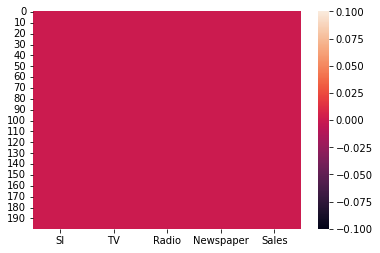

In [17]:
sns.heatmap(df.isnull())

In [18]:
# droping serial number columns.
df.drop(['Sl'],axis=1,inplace=True)

# EDA(Exploratory Data Analysis)

### Univariate Analysis

Minimum Price 0.7 Maximum Price 296.4


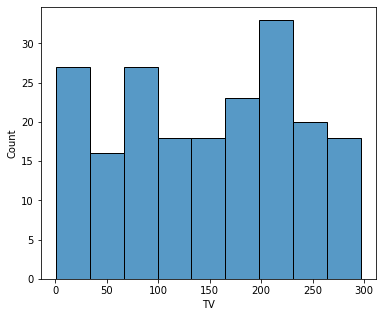

In [19]:
plt.figure(figsize=(6,5))
sns.histplot(x='TV',data=df)
print("Minimum Price",df['TV'].min(),"Maximum Price",df['TV'].max())

Maximum Money Paid for advertising In Television is between 200 to 230,followed by Price range 0 to 30, 60 to 100.

Minimum Price 0.0 Maximum Price 49.6


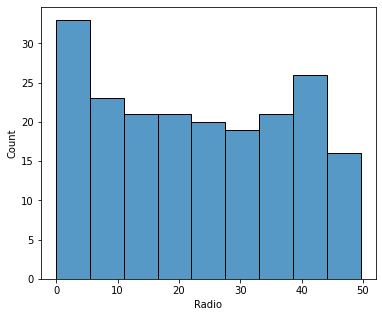

In [20]:
plt.figure(figsize=(6,5))
sns.histplot(x='Radio',data=df)
print("Minimum Price",df['Radio'].min(),"Maximum Price",df['Radio'].max())

Maximum Money for Radio Advertisement is paid between 0 to 5, followed by a range of 39 to 44.

All range money paid is between 0 to 49.6, All advertisement count is used is more than 15.

News Paper Maximum Sales 0.3 News Paper Minimum Sales 0.3


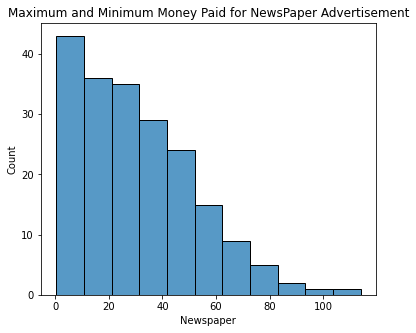

In [21]:
plt.figure(figsize=(6,5))
sns.histplot(x='Newspaper',data=df)
plt.title('Maximum and Minimum Money Paid for NewsPaper Advertisement')
print("News Paper Maximum Sales",df['Newspaper'].min(),"News Paper Minimum Sales",df['Newspaper'].min())

Maximum Money Paid for Newspaper add is between 0 to 10, followed 10 to 42... lower people opted by news paper adds.  

Maximum Sales 27.0


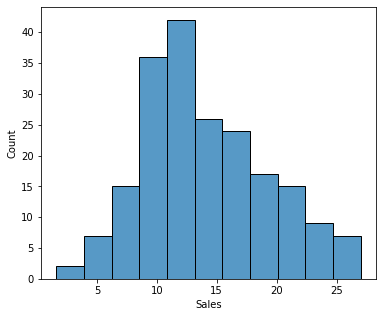

In [22]:
plt.figure(figsize=(6,5))
sns.histplot(x='Sales',data=df)
print("Maximum Sales",df['Sales'].max())

Maximum Sales Counts are noted between 8 to 13

# Bivariate

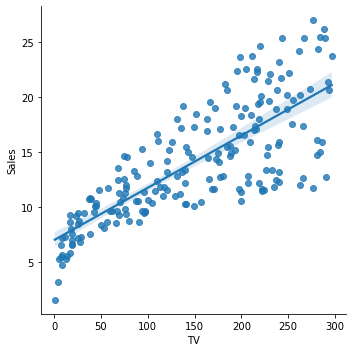

In [23]:
sns.lmplot(x='TV',y='Sales',data=df)

TV Advertisement have a very positive correlation with sales, their is a few deviation in sales from ads above 150.

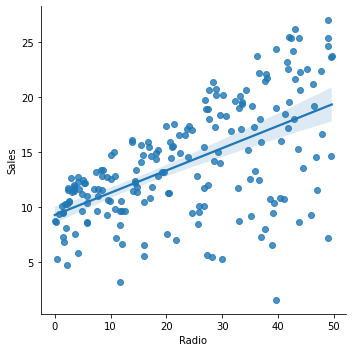

In [24]:
sns.lmplot(x='Radio',y='Sales',data=df)

Radio advertisement show posite sales till 25 but graph shows some negative deviation between 40 to 50

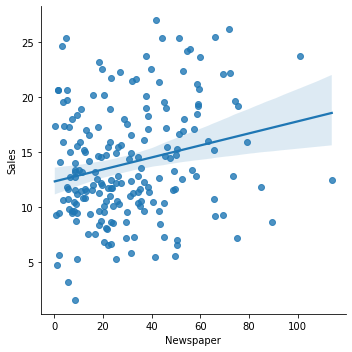

In [25]:
sns.lmplot(x='Newspaper',y='Sales',data=df)

Maximum Sale with Newspaper between 0 to 40, sales are quite high and low...but its shows a positive relation

# Multivariate Analysis

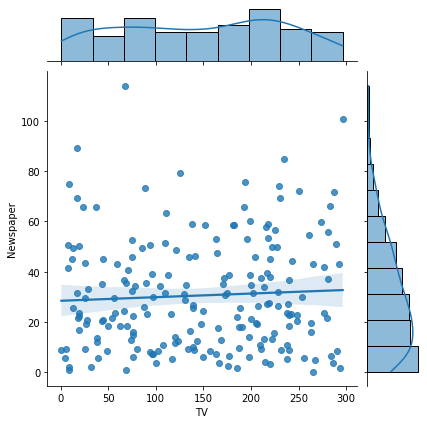

In [26]:
sns.jointplot(y='Newspaper',x='TV',data=df,kind='reg')

Newspaper ads are high between 0 to 40 Ads, where as TV ads have high impact its shows high 200 to 250

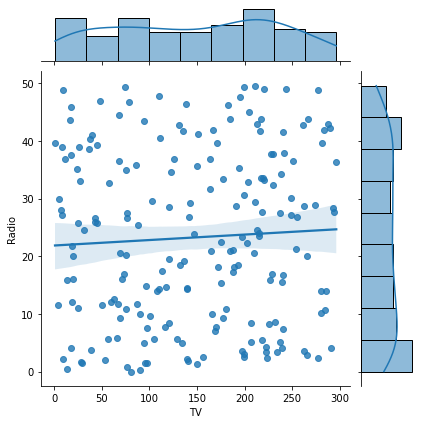

In [27]:
sns.jointplot(x='TV',y='Radio',data=df,kind='reg')

Tv ads are quite more prefered by then radio

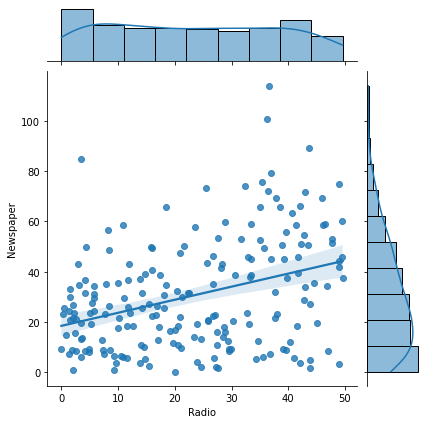

In [28]:
sns.jointplot(x='Radio',y='Newspaper',data=df,kind='reg')

Radio ads are more prefered then Newspaper

# Perarson Plot(Pair plot)

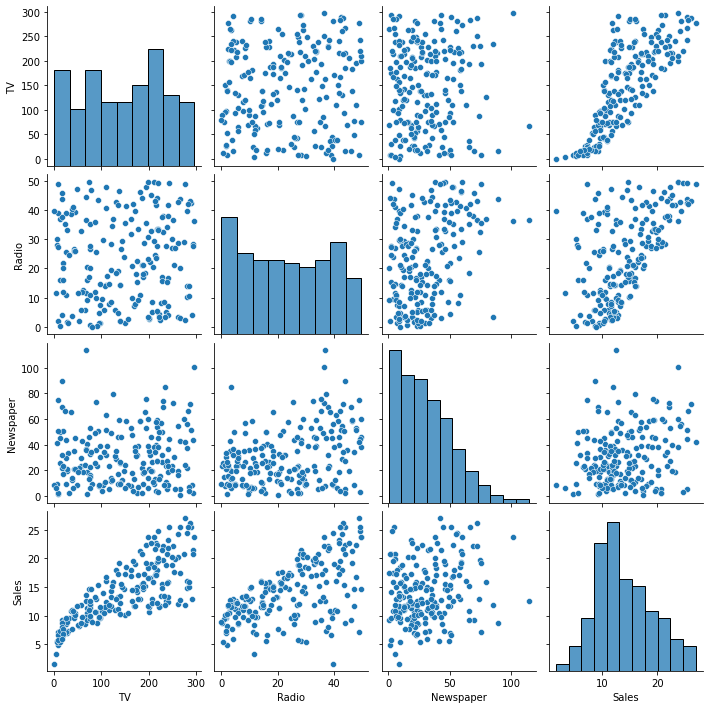

In [29]:
sns.pairplot(data=df)

# Description Statistics

In [30]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Text(0.5, 1.0, 'Description')

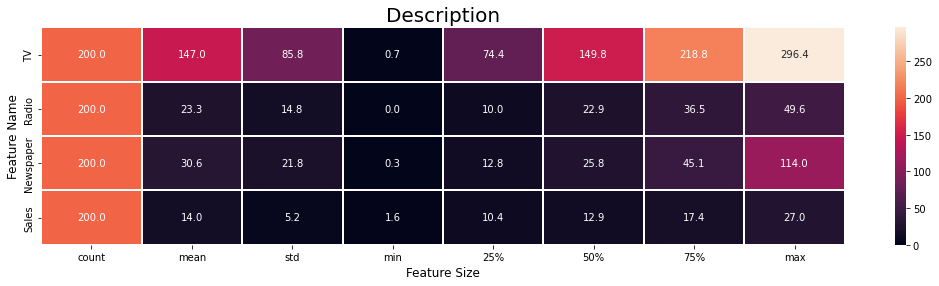

In [31]:
plt.figure(figsize=(18,4))
sns.heatmap(round(df.describe()[:].transpose(),2),square=False,annot=True,linewidth=0.02,linecolor='white',fmt='0.1f')
plt.xlabel('Feature Size',fontsize=12)
plt.ylabel('Feature Name',fontsize=12)
plt.title('Description',fontsize=20)

### My observation on columns:
0. Null values: NIL
1. Right Skewed:  Radio,Newspaper
2. Left Skewed:   TV
3. Standard Deviation: TV,Newspaper 
4. Outliers: Newpaper,TV having maximum outlier

# Correlation

In [32]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [33]:
df.corr().Sales.sort_values()

Newspaper    0.228299
Radio        0.576223
TV           0.782224
Sales        1.000000
Name: Sales, dtype: float64

<AxesSubplot:>

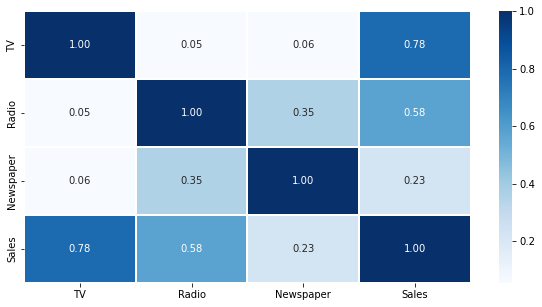

In [34]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,linewidth=0.02,linecolor='white',fmt='0.2f',cmap='Blues')

### Observation:
    
1. TV is 78 percentage postively correlated  with Sales
2. Radio is 58 percentage positively correlated with Sales
3. Newspaper is 23 Percentage positively correlated with Sales

Maximum correlation:-TV
Lowest Correlation:- Newspaper

Text(0.5, 1.0, 'CORRELATION')

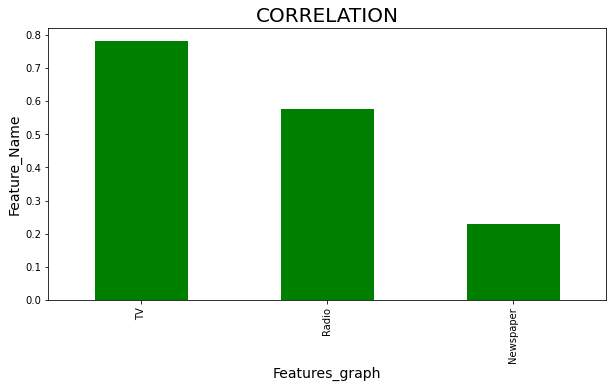

In [35]:
plt.figure(figsize=(10,5))
df.corr()['Sales'].sort_values(ascending=False).drop(['Sales']).plot(kind='bar',color='g')
plt.xlabel('Features_graph',fontsize=14)
plt.ylabel('Feature_Name',fontsize=14)
plt.title('CORRELATION',fontsize=20)

# Outliers

<AxesSubplot:>

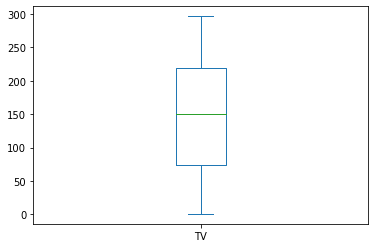

In [36]:
df['TV'].plot.box()

TV column show No outliers

<AxesSubplot:xlabel='Radio'>

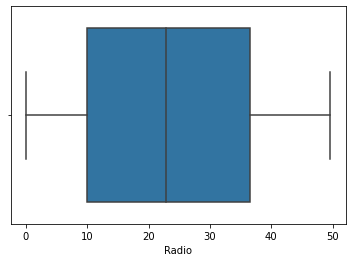

In [37]:
sns.boxplot(x='Radio',data=df)

Radio Column Shows No Outliers

<AxesSubplot:xlabel='Newspaper'>

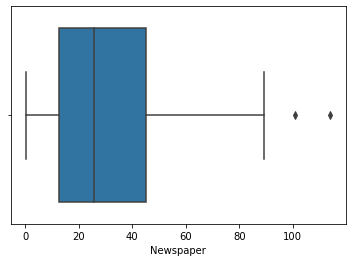

In [38]:
sns.boxplot(x='Newspaper',data=df)

From all the following data we find outliers are present in Newspaper column

<AxesSubplot:xlabel='Sales'>

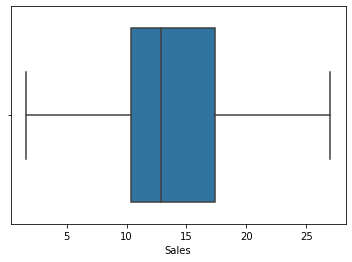

In [39]:
sns.boxplot(data=df,x='Sales')

Sales column showes No outliers

# Skewness

In [40]:
df.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales        0.407571
dtype: float64

Outcome shows: Skewness Threshold is taken is(+/-65).
`Column showing skewness are..
- Newspaper

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

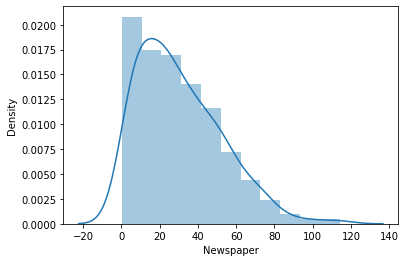

In [41]:
sns.distplot(df['Newspaper'])

The data is the given graph shows is not Normalised.The building blocks are beyond the normal curve.

## Lets Check with Other Graphs As well

<AxesSubplot:xlabel='Radio', ylabel='Density'>

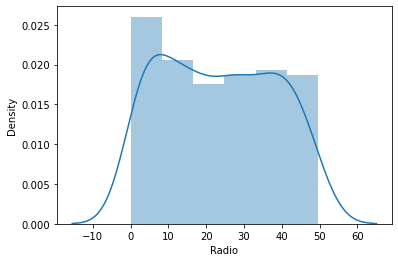

In [42]:
sns.distplot(df['Radio'])

The data column are not normalised. The building blocks are beyond the normal Curve. Bimodel Graph(Having two Modes)

<AxesSubplot:xlabel='TV', ylabel='Density'>

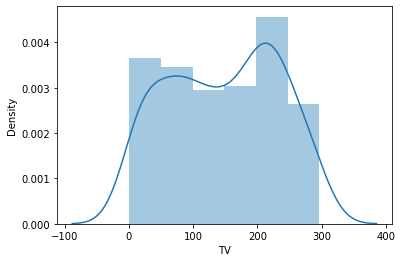

In [43]:
sns.distplot(df['TV'])

The data column are not normalised. The building blocks are beyond the normal Curve. Bidomial Graph(Having two modes)

<AxesSubplot:xlabel='Sales', ylabel='Density'>

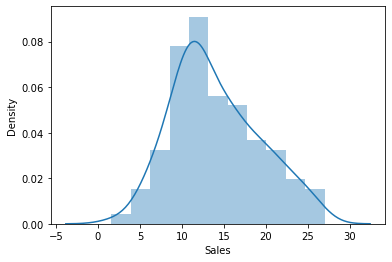

In [44]:
sns.distplot(df['Sales'])

The data column are not normalised. The building blocks are beyond the normal Curve

# Data Cleansing

In [45]:
#checking correlation
df.corr()['Sales'].sort_values()

Newspaper    0.228299
Radio        0.576223
TV           0.782224
Sales        1.000000
Name: Sales, dtype: float64

### Delete Outliers

In [46]:
from scipy.stats import zscore

In [47]:
z=np.abs(zscore(df))

In [48]:
z

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,1.197376,1.082808,0.669579,0.696046
2,1.516155,1.528463,1.783549,0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,0.841614,1.281802,0.215683
...,...,...,...,...
195,1.270941,1.321031,0.771217,1.234053
196,0.617035,1.240003,1.033598,0.830548
197,0.349810,0.942899,1.111852,0.234898
198,1.594565,1.265121,1.640850,2.205347


In [49]:
threshold=3
np.where(z>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [50]:
z.iloc[16,2]

3.8411707150992718

In [51]:
new_df=df[(z<3).all(axis=1)]

## Data Frame Size count

In [52]:
print("Old Data Frame",df.shape)

print("New Data Frame",new_df.shape)

Old Data Frame (200, 4)
New Data Frame (198, 4)


## Percentage of DATA LOSS:

In [53]:
print("Loss Percentage",((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

Loss Percentage 1.0


In [54]:
new_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [55]:
x=new_df.iloc[:,:-1] # X data
y=new_df.iloc[:,-1] # Y data

In [56]:
print("X Shape",x.shape,"Y Shape ",y.shape)

X Shape (198, 3) Y Shape  (198,)


# Checking Mulicolinarity:

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):# here x is the x train data
    vif=pd.DataFrame()
    vif['Variable']=x.columns #x columns
    vif['Vif Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])] #data from x column
    return vif
    

In [58]:
calc_vif(x)

,Variable,Vif Factors
0,TV,2.502183
1,Radio,3.275285
2,Newspaper,3.126386


All the data are below 10, Hence feature engineering is not required. 

# Remove Skewness

In [59]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

# Standardization

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x=scaler.fit_transform(x)

In [61]:
print("Mean ",round(x.mean()))
print("Standard Deviation ",round(x.std()))

Mean  0
Standard Deviation  1


### Target variable for further process

In [62]:
y.unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 24.4, 11.3, 14.6, 18. , 12.5,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

## As the target variable is in continious variable so we will follow the linear model

In [63]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [64]:
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.3)
    lr.fit(x_train,y_train)
    
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    if round(r2_score(y_train,pred_train),2)==round(r2_score(y_test,pred_test),2):
        print(f"At random State {i},The r2 train score {r2_score(y_train,pred_train)}, r2 test score {r2_score(y_test,pred_test)}")

At random State 11,The r2 train score 0.9014591991462395, r2 test score 0.8972492635077352
At random State 14,The r2 train score 0.9018202902818369, r2 test score 0.9044740825894079
At random State 16,The r2 train score 0.9042053414007357, r2 test score 0.9045623076959016
At random State 41,The r2 train score 0.904239159702787, r2 test score 0.9025836894767865
At random State 52,The r2 train score 0.9046174985298451, r2 test score 0.8967282650561448
At random State 56,The r2 train score 0.9047313937219776, r2 test score 0.8956637717653418
At random State 60,The r2 train score 0.9042772776529262, r2 test score 0.8972583648585333
At random State 69,The r2 train score 0.9046557308912601, r2 test score 0.9029630525227291
At random State 92,The r2 train score 0.9040653293009999, r2 test score 0.8978441563922774
At random State 101,The r2 train score 0.9041427749605053, r2 test score 0.9023666783986454
At random State 102,The r2 train score 0.9040849147012333, r2 test score 0.902965109707451

In [65]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=16,test_size=0.3)
lr.fit(x_train,y_train)#train

#predict
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)

print("Training R2 Score ", r2_score(y_train,pred_train)*100,"Test R2 Score ",r2_score(y_test,pred_test)*100)

print("Mean Absolute Error ",round(mean_absolute_error(y_train,pred_train),2),"Mean Absolute Error ",round(mean_absolute_error(y_test,pred_test),2))
print("Mean Squared Error ",mean_squared_error(y_train,pred_train),"Mean Squared Test Error ",mean_squared_error(y_test,pred_test))

Training R2 Score  90.42053414007357 Test R2 Score  90.45623076959016
Mean Absolute Error  1.2 Mean Absolute Error  1.26
Mean Squared Error  2.641342087356916 Mean Squared Test Error  2.381915632301329


# Cross Validation

In [67]:
from sklearn.model_selection import cross_val_score

r2_train=r2_score(y_train,pred_train)#pred train
r2_test=r2_score(y_test,pred_test)#predict test

for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    print("At CrossFold ",i,"The CV_Score is ",cv_mean,"Training accuracy score is ",r2_train,"Test accuracy", r2_test)
    

At CrossFold  2 The CV_Score is  0.9017064197605746 Training accuracy score is  0.9042053414007357 Test accuracy 0.9045623076959016
At CrossFold  3 The CV_Score is  0.8973645562112824 Training accuracy score is  0.9042053414007357 Test accuracy 0.9045623076959016
At CrossFold  4 The CV_Score is  0.8986654359289576 Training accuracy score is  0.9042053414007357 Test accuracy 0.9045623076959016
At CrossFold  5 The CV_Score is  0.895827096855507 Training accuracy score is  0.9042053414007357 Test accuracy 0.9045623076959016
At CrossFold  6 The CV_Score is  0.8987009469201537 Training accuracy score is  0.9042053414007357 Test accuracy 0.9045623076959016
At CrossFold  7 The CV_Score is  0.894944294999198 Training accuracy score is  0.9042053414007357 Test accuracy 0.9045623076959016
At CrossFold  8 The CV_Score is  0.8980187277211998 Training accuracy score is  0.9042053414007357 Test accuracy 0.9045623076959016
At CrossFold  9 The CV_Score is  0.8938982316418994 Training accuracy score is

In [68]:
lr_score_selected=cross_val_score(lr,x,y,cv=2).mean() # mean value

pred_lr= lr.predict(x_test)# predict linear regression

lss=r2_score(y_test,pred_lr) #saved value for 
lss

0.9045623076959016

In [69]:
print("The cv score is: ",lr_score_selected,"\nThe Accuracy score is: ",lss)

The cv score is:  0.9017064197605746 
The Accuracy score is:  0.9045623076959016


Since the number of folds doesn't have such impact on the accuracy and cv_score.  But on a safe side we will go with cv=2
Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score.

# Regularlization:

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameter={'alpha':[0.0001,0.001,0.01,0.1,1],'selection':['cyclic', 'random']}
ls=Lasso()
gsv=GridSearchCV(ls,parameter)
gsv.fit(x_train,y_train)

print(gsv.best_params_)
print(gsv.best_score_) 

{'alpha': 0.1, 'selection': 'random'}
0.8902097399252135


In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
parameter={'alpha':[0.0001,0.001,0.01,0.1,1],'solver':['auto','svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}
rd=Ridge()
gsv=GridSearchCV(rd,parameter)
gsv.fit(x_train,y_train)

print(gsv.best_params_)
print(gsv.best_score_) 

{'alpha': 0.001, 'solver': 'saga'}
0.8897188025580999


In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
parameter={'alpha':[0.0001,0.001,0.01,0.1,1],'selection':['cyclic', 'random']}
en=ElasticNet()
gsv=GridSearchCV(en,parameter)
gsv.fit(x_train,y_train)

print(gsv.best_params_)
print(gsv.best_score_) 

{'alpha': 0.01, 'selection': 'random'}
0.8897790447299669


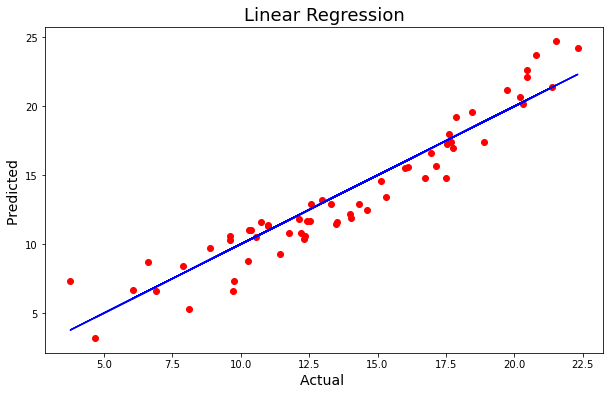

In [73]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='r')

plt.plot(pred_test,pred_test,color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

In [74]:
lr.coef_

array([3.8933025 , 2.72574199, 0.02567379])

In [75]:
# Lasso works better so using the same model..
ls=Lasso(alpha=0.1)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9035292036334897

In [76]:
ls.coef_

array([3.804908  , 2.64365634, 0.        ])

# Model_Selection

# Decision Tree

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

parameter={'criterion':['squared_error','friedman_mse', 'absolute_error', 'poisson'],
          'splitter':['best', 'random'],
          'max_features':['auto','sqrt', 'log2']}

dtc=DecisionTreeRegressor()
gsv=GridSearchCV(dtc,parameter)
gsv.fit(x_train,y_train)

print(gsv.best_params_)
print(gsv.best_score_) 

{'criterion': 'absolute_error', 'max_features': 'auto', 'splitter': 'best'}
0.943215625399553


In [78]:
dtc=DecisionTreeRegressor(criterion='squared_error',max_features='auto',splitter='best')
dtc.fit(x_train,y_train)

pred_train=dtc.predict(x_train)
pred_test=dtc.predict(x_test)


print("Training R2 Score ", r2_score(y_train,pred_train)*100,"Test R2 Score ",r2_score(y_test,pred_test)*100)
print("Mean Absolute Error ",round(mean_absolute_error(y_train,pred_train),2),"Mean Absolute Error ",round(mean_absolute_error(y_test,pred_test),2))
print("Mean Squared Error ",mean_squared_error(y_train,pred_train),"Mean Squared Test Error ",mean_squared_error(y_test,pred_test))

Training R2 Score  100.0 Test R2 Score  95.96519058664673
Mean Absolute Error  0.0 Mean Absolute Error  0.77
Mean Squared Error  0.0 Mean Squared Test Error  1.0069999999999997


In [79]:
r2_train=r2_score(y_train,pred_train)#pred train
r2_test=r2_score(y_test,pred_test)#predict test

for i in range(2,10):
    cv_score=cross_val_score(dtc,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    print("At CrossFold ",i,"The CV_Score is ",cv_mean,"Training accuracy score is ",r2_train,"Test accuracy", r2_test)

At CrossFold  2 The CV_Score is  0.9344810445351089 Training accuracy score is  1.0 Test accuracy 0.9596519058664673
At CrossFold  3 The CV_Score is  0.9437056401684835 Training accuracy score is  1.0 Test accuracy 0.9596519058664673
At CrossFold  4 The CV_Score is  0.9389650379313178 Training accuracy score is  1.0 Test accuracy 0.9596519058664673
At CrossFold  5 The CV_Score is  0.954699936581366 Training accuracy score is  1.0 Test accuracy 0.9596519058664673
At CrossFold  6 The CV_Score is  0.9361763503728161 Training accuracy score is  1.0 Test accuracy 0.9596519058664673
At CrossFold  7 The CV_Score is  0.9472549933464698 Training accuracy score is  1.0 Test accuracy 0.9596519058664673
At CrossFold  8 The CV_Score is  0.9465773343587833 Training accuracy score is  1.0 Test accuracy 0.9596519058664673
At CrossFold  9 The CV_Score is  0.9384780186531698 Training accuracy score is  1.0 Test accuracy 0.9596519058664673


Cv score is better in  cross_val score 5 as its near to Test Accuracy

# Model Map Ploting 

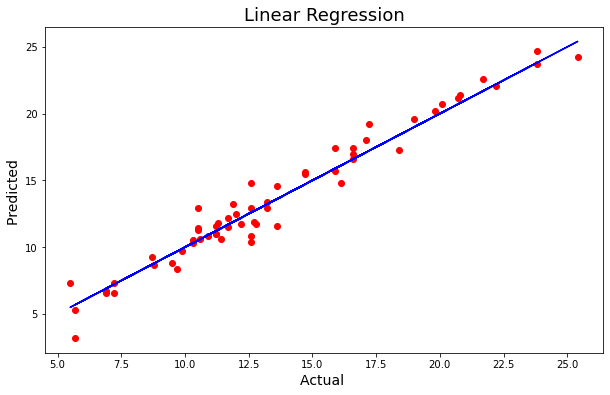

In [80]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='r')

plt.plot(pred_test,pred_test,color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# Support Vector Machine

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

parameter={'kernel':['linear', 'poly', 'rbf','sigmoid'],'gamma':['scale', 'auto']}

svr=SVR()
gsv=GridSearchCV(svr,parameter)
gsv.fit(x_train,y_train)

print(gsv.best_params_)
print(gsv.best_score_) 

{'gamma': 'scale', 'kernel': 'linear'}
0.8903935476947001


In [82]:
svr=SVR(kernel='linear',gamma='scale')
svr.fit(x_train,y_train)

pred_train=svr.predict(x_train)
pred_test=svr.predict(x_test)

print("Training R2 Score ", r2_score(y_train,pred_train)*100,"Test R2 Score ",r2_score(y_test,pred_test)*100)
print("Mean Absolute Error ",round(mean_absolute_error(y_train,pred_train),2),"Mean Absolute Error ",round(mean_absolute_error(y_test,pred_test),2))
print("Mean Squared Error ",mean_squared_error(y_train,pred_train),"Mean Squared Test Error ",mean_squared_error(y_test,pred_test))

Training R2 Score  90.34392196015732 Test R2 Score  90.12406882022296
Mean Absolute Error  1.21 Mean Absolute Error  1.27
Mean Squared Error  2.662466331461536 Mean Squared Test Error  2.46481597498066


In [83]:
r2_train=r2_score(y_train,pred_train)#pred train
r2_test=r2_score(y_test,pred_test)#predict test

for i in range(2,10):
    cv_score=cross_val_score(svr,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    print("At CrossFold ",i,"The CV_Score is ",cv_mean,"Training accuracy score is ",r2_train,"Test accuracy", r2_test)

At CrossFold  2 The CV_Score is  0.8992671015275284 Training accuracy score is  0.9034392196015731 Test accuracy 0.9012406882022296
At CrossFold  3 The CV_Score is  0.8922295274684725 Training accuracy score is  0.9034392196015731 Test accuracy 0.9012406882022296
At CrossFold  4 The CV_Score is  0.8898608995264119 Training accuracy score is  0.9034392196015731 Test accuracy 0.9012406882022296
At CrossFold  5 The CV_Score is  0.8884794953695188 Training accuracy score is  0.9034392196015731 Test accuracy 0.9012406882022296
At CrossFold  6 The CV_Score is  0.891514598281771 Training accuracy score is  0.9034392196015731 Test accuracy 0.9012406882022296
At CrossFold  7 The CV_Score is  0.8897041434381473 Training accuracy score is  0.9034392196015731 Test accuracy 0.9012406882022296
At CrossFold  8 The CV_Score is  0.8931375674411823 Training accuracy score is  0.9034392196015731 Test accuracy 0.9012406882022296
At CrossFold  9 The CV_Score is  0.8874287555413792 Training accuracy score i

cross fold 2 is better in SVR as its near to r2 test score

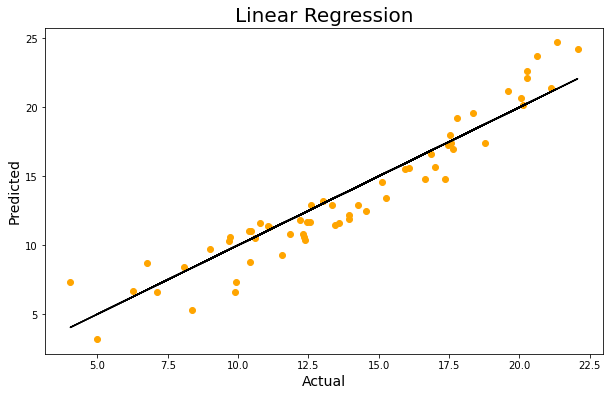

In [84]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='orange')
plt.plot(pred_test,pred_test,color='black')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("Linear Regression",fontsize=20)
plt.show()

## Regularization

In [85]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}

ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)


print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [86]:
ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)# Training

ls_score_training=ls.score(x_train,y_train)#score
pred_ls=ls.predict(x_test)

ls_score_training*100

90.35292036334897

In [87]:
pred_ls=ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
print(lss)

cv_score=cross_val_score(ls,x,y,cv=2)
cv_mean=cv_score.mean()
cv_mean

0.9011953503758984


0.9014616379006017

## KNeighborsRegressor

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

parameter={'n_neighbors':list(range(1,10)),'weights' :['uniform','distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
          'leaf_size':list(range(28,40))}

knr=KNeighborsRegressor()
gsv=GridSearchCV(knr,parameter)
gsv.fit(x_train,y_train)

print(gsv.best_params_,gsv.best_score_)

{'algorithm': 'auto', 'leaf_size': 28, 'n_neighbors': 4, 'weights': 'distance'} 0.9355859312853398


In [89]:
knn=KNeighborsRegressor(leaf_size=28,n_neighbors=4,weights='distance')
knn.fit(x_train,y_train)

pred_train=knn.predict(x_train)
pred_test=knn.predict(x_test)

print("Train and Test r2 score",r2_score(y_train,pred_train),", ",r2_score(y_test,pred_test))
print("Train and Test MSE score",mean_squared_error(y_train,pred_train),",",mean_squared_error(y_test,pred_test))
print("Train and test Absolute ",mean_absolute_error(y_train,pred_train),",",mean_absolute_error(y_train,pred_train))

Train and Test r2 score 1.0 ,  0.9312069113835496
Train and Test MSE score 0.0 , 1.7169247203473827
Train and test Absolute  0.0 , 0.0


In [90]:
from sklearn.model_selection import cross_val_score

r2score_train=r2_score(y_train,pred_train)
r2score_test=r2_score(y_test,pred_test)

for i in range(2,10):
    cv_score=cross_val_score(knn,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    print(f"At cross fold {i} the cv_score {cv_mean} and training_score is {r2score_train} and testing_score is {r2score_test}")

At cross fold 2 the cv_score 0.9370623219873347 and training_score is 1.0 and testing_score is 0.9312069113835496
At cross fold 3 the cv_score 0.9184548402730784 and training_score is 1.0 and testing_score is 0.9312069113835496
At cross fold 4 the cv_score 0.9493356014464307 and training_score is 1.0 and testing_score is 0.9312069113835496
At cross fold 5 the cv_score 0.9459434217880343 and training_score is 1.0 and testing_score is 0.9312069113835496
At cross fold 6 the cv_score 0.9426013484634543 and training_score is 1.0 and testing_score is 0.9312069113835496
At cross fold 7 the cv_score 0.9506542093847313 and training_score is 1.0 and testing_score is 0.9312069113835496
At cross fold 8 the cv_score 0.9503655671384781 and training_score is 1.0 and testing_score is 0.9312069113835496
At cross fold 9 the cv_score 0.9415199239694011 and training_score is 1.0 and testing_score is 0.9312069113835496


Almost all the accuracy are near by the Cross fold 2 is being selected as maximum models that cv to be better and its also near to the test accuracy.

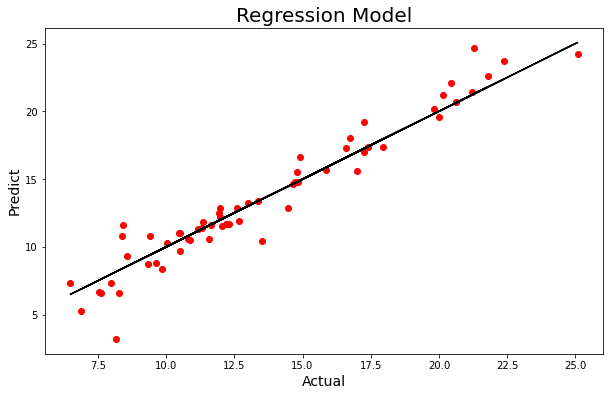

In [91]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='r')
plt.plot(pred_test,pred_test,color='black')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predict",fontsize=14)
plt.title("Regression Model",fontsize=20)
plt.show()

# Stochastic Gradient Descent (SGD-Regressor)

In [92]:
from sklearn.linear_model import SGDRegressor
parameters={'alpha':[0.0001,0.001,0.01,0.1],'penalty':['l2', 'l1', 'elasticnet'],'max_iter':list(range(1000,1050)),'validation_fraction':[0.1,0.2,0.3,0.4],'n_iter_no_change':list(range(1,10))}

sgd=SGDRegressor()
gsv=GridSearchCV(sgd,parameters)
gsv.fit(x_train,y_train)

print('Best Score',gsv.best_score_)
print("Best Parameter",gsv.best_params_)


Best Score 0.8913141866080856
Best Parameter {'alpha': 0.1, 'max_iter': 1022, 'n_iter_no_change': 1, 'penalty': 'l1', 'validation_fraction': 0.2}


### Model: SGD

In [93]:
sgd=SGDRegressor(alpha=0.1,max_iter=1036,n_iter_no_change=1,penalty='l1',validation_fraction=0.3)
sgd.fit(x_train,y_train)

pred_train=sgd.predict(x_train)
pred_test=sgd.predict(x_test)

print("Train and Test r2 score",r2_score(y_train,pred_train),", ",r2_score(y_test,pred_test))
print("Train and Test MSE score",mean_squared_error(y_train,pred_train),",",mean_squared_error(y_test,pred_test))
print("Train and test Absolute Error",mean_absolute_error(y_train,pred_train),",",mean_absolute_error(y_train,pred_train))

Train and Test r2 score 0.9030884326914026 ,  0.901980157757225
Train and Test MSE score 2.6721385641629807 , 2.4463604355587494
Train and test Absolute Error 1.2081922413359731 , 1.2081922413359731


### Cross Validation Score on SGD

In [94]:
from sklearn.model_selection import cross_val_score

r2score_train=r2_score(y_train,pred_train)
r2score_test=r2_score(y_test,pred_test)

for i in range(2,10):
    cv_score=cross_val_score(sgd,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    print(f"Cross fold {i} the cv_score {cv_mean} and training_score is {r2score_train} and testing_score is {r2score_test}")

Cross fold 2 the cv_score 0.8999889936590757 and training_score is 0.9030884326914026 and testing_score is 0.901980157757225
Cross fold 3 the cv_score 0.8964788690076698 and training_score is 0.9030884326914026 and testing_score is 0.901980157757225
Cross fold 4 the cv_score 0.8986257545088745 and training_score is 0.9030884326914026 and testing_score is 0.901980157757225
Cross fold 5 the cv_score 0.8962566047493636 and training_score is 0.9030884326914026 and testing_score is 0.901980157757225
Cross fold 6 the cv_score 0.8980308354748731 and training_score is 0.9030884326914026 and testing_score is 0.901980157757225
Cross fold 7 the cv_score 0.8953184198920395 and training_score is 0.9030884326914026 and testing_score is 0.901980157757225
Cross fold 8 the cv_score 0.8983742597328124 and training_score is 0.9030884326914026 and testing_score is 0.901980157757225
Cross fold 9 the cv_score 0.894352898155601 and training_score is 0.9030884326914026 and testing_score is 0.901980157757225


At Cross Fold 2, the testing score is close to cv_score so we will select this 

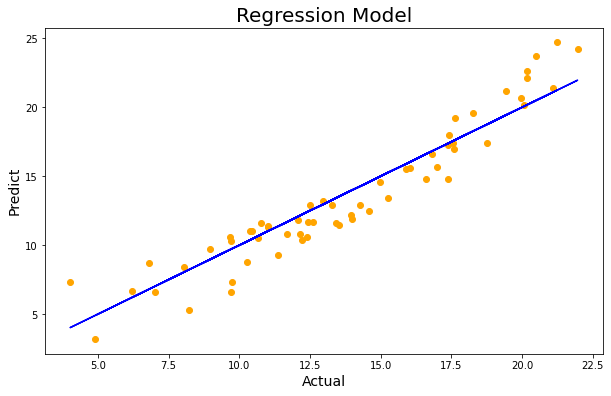

In [95]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='orange')
plt.plot(pred_test,pred_test,color='b')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predict",fontsize=14)
plt.title("Regression Model",fontsize=20)
plt.show()

### Model Regularization

In [96]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}

ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)


print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [97]:
ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)# Training

ls_score_training=ls.score(x_train,y_train)#score
pred_ls=ls.predict(x_test)#pred_test

ls_score_training*100

90.35292036334897

In [98]:
pred_ls=ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
print(lss)

cv_score=cross_val_score(sgd,x,y,cv=2)
cv_mean=cv_score.mean()
cv_mean

0.9011953503758984


0.9015188651254686

# Ensemble technique

### Hyper Papameter Tuning- Random Forest Regressor

In [99]:
from sklearn.ensemble import RandomForestRegressor
parameters={'n_estimators':list(range(100,125)),
           'criterion':['squared_error', 'absolute_error', 'poisson'],
            'random_state':list(range(1,10)),
           'max_features':['sqrt','log2']}

rf=RandomForestRegressor()
gs=GridSearchCV(rf,parameters)
gs.fit(x_train,y_train)

print("Best Parameter",gs.best_params_)
print("Best Score",gs.best_score_)

Best Parameter {'criterion': 'absolute_error', 'max_features': 'sqrt', 'n_estimators': 106, 'random_state': 1}
Best Score 0.9134097885191073


### Model Random Forest Regressor

In [100]:
#Train
rf=RandomForestRegressor(n_estimators= 106,criterion='absolute_error',random_state=1,max_features='sqrt')
rf.fit(x_train,y_train)

pred_train=rf.predict(x_train) #predict train
pred_test=rf.predict(x_test)# predict Test

#Checking score and Errors
print("Train and Test r2 score",r2_score(y_train,pred_train),", ",r2_score(y_test,pred_test))
print("Train and Test MSE score",mean_squared_error(y_train,pred_train),",",mean_squared_error(y_test,pred_test))
print("Train and test Absolute Error",mean_absolute_error(y_train,pred_train),",",mean_absolute_error(y_test,pred_test))

Train and Test r2 score 0.9871454165003477 ,  0.9354526551312852
Train and Test MSE score 0.35443888949081814 , 1.6109602616589527
Train and test Absolute Error 0.40970741044571934 , 1.0117138364779874


### Cross validation With Random Forest

In [101]:
from sklearn.model_selection import cross_val_score

r2score_train=r2_score(y_train,pred_train)
r2score_test=r2_score(y_test,pred_test)

for i in range(2,10):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    print(f"Cross fold {i} the cv_score {cv_mean} and training_score is {r2score_train} and testing_score is {r2score_test}")

Cross fold 2 the cv_score 0.8956810943724827 and training_score is 0.9871454165003477 and testing_score is 0.9354526551312852
Cross fold 3 the cv_score 0.9189635088794365 and training_score is 0.9871454165003477 and testing_score is 0.9354526551312852
Cross fold 4 the cv_score 0.9268843942055485 and training_score is 0.9871454165003477 and testing_score is 0.9354526551312852
Cross fold 5 the cv_score 0.9282428554165139 and training_score is 0.9871454165003477 and testing_score is 0.9354526551312852
Cross fold 6 the cv_score 0.9318341308383237 and training_score is 0.9871454165003477 and testing_score is 0.9354526551312852
Cross fold 7 the cv_score 0.9305695715444388 and training_score is 0.9871454165003477 and testing_score is 0.9354526551312852
Cross fold 8 the cv_score 0.9394312986001396 and training_score is 0.9871454165003477 and testing_score is 0.9354526551312852
Cross fold 9 the cv_score 0.9304888891845591 and training_score is 0.9871454165003477 and testing_score is 0.935452655

At Cross Fold 8 the score is close to R2 accuracy testing_score 

### Graph Ploting(Random Forest)

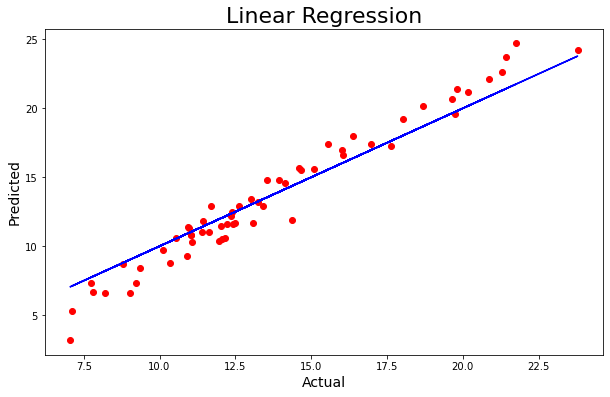

In [102]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='red')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
plt.title("Linear Regression",fontsize=22)
plt.show()

### Regularization {Random Forest}

In [103]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}

ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
    
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [104]:
# final training
ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)

ls_score_training=ls.score(x_train,y_train) # train
pred_ls=ls.predict(x_test)# predict

print(" Model Train Score",ls_score_training*100)

 Model Train Score 90.35292036334897


In [105]:
pred_ls=ls.predict(x_test)
lss = r2_score(y_test,pred_ls)
print("Test R2 Score",lss)# test score

cv_score=cross_val_score(rf,x,y,cv=8)
cv_mean=cv_score.mean()
print("Mean Score",cv_mean)# mean Score

Test R2 Score 0.9011953503758984
Mean Score 0.9394312986001396


# Hyper-Parameter Tuning (Extra Trees)

In [106]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

parameter={'n_estimators':list(range(100,105)),
           'max_features':list(range(1,20)),
          'random_state':list(range(1,20))}

et=ExtraTreesRegressor()
gsv=GridSearchCV(et,parameter)
gsv.fit(x_train,y_train)

print("Score ",gsv.best_score_," Best parameter ",gsv.best_params_)

Score  0.9819519842027914  Best parameter  {'max_features': 3, 'n_estimators': 100, 'random_state': 3}


### Training the Extra Trees Model based on given Hyper Parameter 

In [107]:
et=ExtraTreesRegressor(n_estimators=100 ,max_features= 3,random_state=3 )
et.fit(x_train,y_train)#train
et_score=et.score(x_train,y_train)

#predict
pred_train=et.predict(x_train)
pred_test=et.predict(x_test)

#Checking Score and erros
print("Train and Test r2 score",r2_score(y_train,pred_train),", ",r2_score(y_test,pred_test))
print("Train and Test MSE score",mean_squared_error(y_train,pred_train),",",mean_squared_error(y_test,pred_test))
print("Train and test Absolute Error",mean_absolute_error(y_train,pred_train),",",mean_absolute_error(y_test,pred_test))

Train and Test r2 score 0.9999998880440563 ,  0.9907026672013468
Train and Test MSE score 3.086956521728912e-06 , 0.23204104999999886
Train and test Absolute Error 0.00027536231885527836 , 0.3664833333333329


### Checking Cross Validation Score based on model 

In [108]:
r2score_train=r2_score(y_test,pred_test) #score r2 train
r2score_test=r2_score(y_test,pred_test)# score r2 test
#checking cv score
for i in range(2,10):
    cv_score=cross_val_score(et,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    #checking cross validation, cross_val_mean with r2_score
    
    print(f"Cross fold {i} the cv_score {cv_mean} and training_score is {r2score_train} and testing_score is {r2score_test}")          

Cross fold 2 the cv_score 0.9845673874895311 and training_score is 0.9907026672013468 and testing_score is 0.9907026672013468
Cross fold 3 the cv_score 0.9871665184347785 and training_score is 0.9907026672013468 and testing_score is 0.9907026672013468
Cross fold 4 the cv_score 0.9879420845324123 and training_score is 0.9907026672013468 and testing_score is 0.9907026672013468
Cross fold 5 the cv_score 0.9870701969322386 and training_score is 0.9907026672013468 and testing_score is 0.9907026672013468
Cross fold 6 the cv_score 0.9880972194464346 and training_score is 0.9907026672013468 and testing_score is 0.9907026672013468
Cross fold 7 the cv_score 0.988010654200859 and training_score is 0.9907026672013468 and testing_score is 0.9907026672013468
Cross fold 8 the cv_score 0.9885454402569922 and training_score is 0.9907026672013468 and testing_score is 0.9907026672013468
Cross fold 9 the cv_score 0.9873342327701862 and training_score is 0.9907026672013468 and testing_score is 0.9907026672

Allmost all the training score is approx 99 percentage with compare of testing score, we are selecting 3 as per perdictions with other models also

### Checking Graph for the Model {ExtraTrees Model}

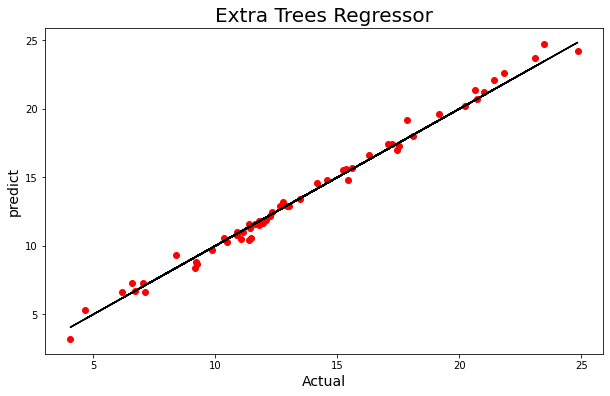

In [109]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='red')
plt.plot(pred_test,pred_test,color='black')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("predict",fontsize=14)
plt.title("Extra Trees Regressor",fontsize=20)
plt.savefig('et.png')
plt.show()

### Model Regularization

In [110]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}

ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
    
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [111]:
# final training
ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train) # train

print(" Model Train Score",ls_score_training*100)

 Model Train Score 90.35292036334897


In [112]:
pred_ls=ls.predict(x_test)# predict
lss = r2_score(y_test,pred_ls)

print("Test R2 Score",lss)# test score

cv_score=cross_val_score(et,x,y,cv=2)
cv_mean=cv_score.mean()
print("Mean Score",cv_mean)# mean Score

Test R2 Score 0.9011953503758984
Mean Score 0.9845673874895311


# Hyper parameter tuning for Ada Boost

In [113]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()

parameter={'learning_rate':[1.0,2.0,3.0,4.0,5.0,6.0],
           'loss':['linear', 'square', 'exponential'],
           'n_estimators':list(range(50,70))}

gsv=GridSearchCV(ada,parameter)
gsv.fit(x_train,y_train)

print("Best Score",gsv.best_score_," Best Parameters ",gsv.best_params_)

Best Score 0.9526124641322469  Best Parameters  {'learning_rate': 2.0, 'loss': 'exponential', 'n_estimators': 52}


### Model: Ada Boost

In [114]:
ada=AdaBoostRegressor(learning_rate=2.0,loss='exponential',n_estimators=57)
ada.fit(x_train,y_train)

#predict
pred_train=ada.predict(x_train)
pred_test=ada.predict(x_test)

#error and score
print("Train and Test r2 score",r2_score(y_train,pred_train),", ",r2_score(y_test,pred_test))
print("Train and Test MSE score",mean_squared_error(y_train,pred_train),",",mean_squared_error(y_test,pred_test))
print("Train and test Absolute Error",mean_absolute_error(y_train,pred_train),",",mean_absolute_error(y_test,pred_test))

Train and Test r2 score 0.9796665982062589 ,  0.9650244722532398
Train and Test MSE score 0.5606520313582432 , 0.8729125178608228
Train and test Absolute Error 0.6233462107885481 , 0.7607157242984215


### Cross Validation Score (Ada Boost)

In [115]:
r2score_train=r2_score(y_test,pred_test) #score r2 train
r2score_test=r2_score(y_test,pred_test)# score r2 test
#checking cv score
for i in range(2,10):
    cv_score=cross_val_score(ada,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    #checking cross validation, cross_val_mean with r2_score
    
    print(f"Cross fold {i} the cv_score {cv_mean} and training_score is {r2score_train} and testing_score is {r2score_test}")          

Cross fold 2 the cv_score 0.9501237577138819 and training_score is 0.9650244722532398 and testing_score is 0.9650244722532398
Cross fold 3 the cv_score 0.9534415695870555 and training_score is 0.9650244722532398 and testing_score is 0.9650244722532398
Cross fold 4 the cv_score 0.9563509240391616 and training_score is 0.9650244722532398 and testing_score is 0.9650244722532398
Cross fold 5 the cv_score 0.9551924797706685 and training_score is 0.9650244722532398 and testing_score is 0.9650244722532398
Cross fold 6 the cv_score 0.9619269171719882 and training_score is 0.9650244722532398 and testing_score is 0.9650244722532398
Cross fold 7 the cv_score 0.9572788945931812 and training_score is 0.9650244722532398 and testing_score is 0.9650244722532398
Cross fold 8 the cv_score 0.9538238515331251 and training_score is 0.9650244722532398 and testing_score is 0.9650244722532398
Cross fold 9 the cv_score 0.9528769651536629 and training_score is 0.9650244722532398 and testing_score is 0.965024472

### Graph Ploting"Ada Boost"

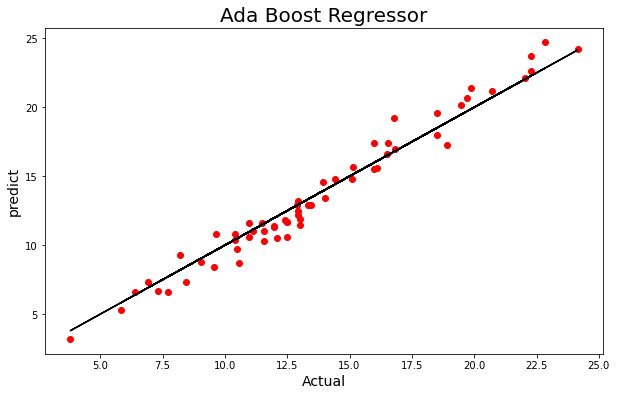

In [116]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='red')
plt.plot(pred_test,pred_test,color='black')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("predict",fontsize=14)
plt.title("Ada Boost Regressor",fontsize=20)
plt.savefig('et.png')
plt.show()

# Hyper Parameter- Gradient Boosting 

In [118]:
from sklearn.ensemble import GradientBoostingRegressor

parameter={'loss':['squared_error','absolute_error', 'huber', 'quantile'],
           'learning_rate':[0.1,0.2,0.3,0.4,0.5],
          'criterion':['friedman_mse', 'squared_error', 'mse'],
          'validation_fraction':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
                          
gbr=GradientBoostingRegressor()
gsv=GridSearchCV(gbr,parameter)
gsv.fit(x_train,y_train)

print("Best Score",gsv.best_score_," Best Parameters ",gsv.best_params_)

Best Score 0.9716818226320114  Best Parameters  {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'absolute_error', 'validation_fraction': 0.8}


### Model: Gradient Boost

In [122]:
gbr=GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.2,loss='absolute_error',alpha=0.6,validation_fraction= 0.8)
gbr.fit(x_train,y_train)

gbr.score(x_train,y_train)# test score

pred_train=gbr.predict(x_train)
pred_dec=gbr.predict(x_test)

#checking error and scores
print("Train and Test r2 score",r2_score(y_train,pred_train),", ",r2_score(y_test,pred_test))
print("Train and Test MSE score",mean_squared_error(y_train,pred_train),",",mean_squared_error(y_test,pred_test))
print("Train and test Absolute Error",mean_absolute_error(y_train,pred_train),",",mean_absolute_error(y_test,pred_test))

Train and Test r2 score 0.994159902143707 ,  0.9650244722532398
Train and Test MSE score 0.1610287722475173 , 0.8729125178608228
Train and test Absolute Error 0.21395093875449245 , 0.7607157242984215


### Cross Validation Gradient Boost

In [123]:
r2score_train=r2_score(y_test,pred_test) #score r2 train
r2score_test=r2_score(y_test,pred_test)# score r2 test
#checking cv score
for i in range(2,10):
    cv_score=cross_val_score(gbr,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    #checking cross validation, cross_val_mean with r2_score
    
    print(f"Cross fold {i} the cv_score {cv_mean} and training_score is {r2score_train} and testing_score is {r2score_test}")          

Cross fold 2 the cv_score 0.9637756808406772 and training_score is 0.9650244722532398 and testing_score is 0.9650244722532398
Cross fold 3 the cv_score 0.973602252488165 and training_score is 0.9650244722532398 and testing_score is 0.9650244722532398
Cross fold 4 the cv_score 0.9723343352839754 and training_score is 0.9650244722532398 and testing_score is 0.9650244722532398
Cross fold 5 the cv_score 0.9705971084294326 and training_score is 0.9650244722532398 and testing_score is 0.9650244722532398
Cross fold 6 the cv_score 0.9719879265345303 and training_score is 0.9650244722532398 and testing_score is 0.9650244722532398
Cross fold 7 the cv_score 0.9705964717402537 and training_score is 0.9650244722532398 and testing_score is 0.9650244722532398
Cross fold 8 the cv_score 0.9677681732755189 and training_score is 0.9650244722532398 and testing_score is 0.9650244722532398
Cross fold 9 the cv_score 0.9716535022434064 and training_score is 0.9650244722532398 and testing_score is 0.9650244722

### Graph Gradient Boost

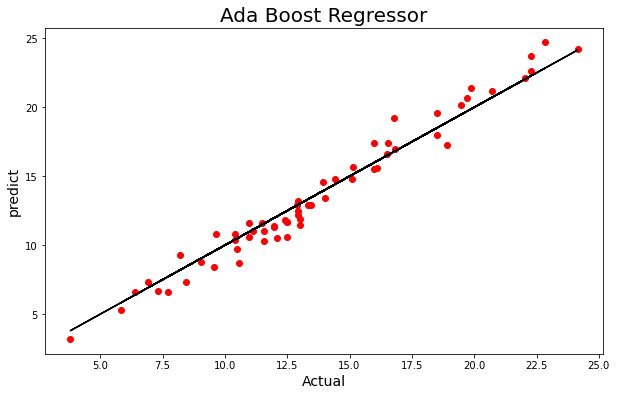

In [124]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='red')
plt.plot(pred_test,pred_test,color='black')
plt.xlabel("Actual",fontsize=14)
plt.ylabel("predict",fontsize=14)
plt.title("Ada Boost Regressor",fontsize=20)
plt.savefig('et.png')
plt.show()

## Saving Model

In [140]:
import pickle
filename='advertise.pkl'
pickle.dump(et,open(filename,'wb'))

In [141]:
loaded_model=pickle.load(open('advertise.pkl','rb'))

In [142]:
result=loaded_model.score(x_test,y_test)
print(result*100)

99.07026672013468


In [143]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_test[:]],index=['Predicted','Original'])

In [144]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Predicted,9.234000,17.087000,21.008000,23.486000,10.90500,14.18500,10.885000,11.769000,11.634000,21.422000,...,12.237000,9.846000,14.565,17.247000,20.225000,8.382000,12.941000,11.358000,13.028000,18.07900
Original,10.581818,15.972727,20.731818,22.826667,9.65625,13.93125,10.391667,12.405882,10.947619,22.043902,...,12.940741,10.481818,14.425,16.528571,19.464286,8.185714,13.346667,10.391667,13.468966,18.51087
